In [1]:
# Import python libraries.
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pylab as pl
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn import datasets 
from sklearn import svm
from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import math
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from statsmodels.formula.api import ols
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

Importing the dataset and selecting the distance columns


In [2]:
fifa = pandas.read_csv('ProjectDataset.csv',low_memory=False) # The names of all the columns in the

print(fifa.columns.values)

['Name' 'Position' 'Rating_class' 'Rating' 'Height' 'Weight'
 'Preffered_Foot' 'Age' 'Weak_foot' 'Skill_Moves' 'Ball_Control'
 'Dribbling' 'Marking' 'Sliding_Tackle' 'Standing_Tackle' 'Aggression'
 'Reactions' 'Attacking_Position' 'Interceptions' 'Vision' 'Composure'
 'Crossing' 'Short_Pass' 'Long_Pass' 'Acceleration' 'Speed' 'Stamina'
 'Strength' 'Balance' 'Agility' 'Jumping' 'Heading' 'Shot_Power'
 'Finishing' 'Long_Shots' 'Curve' 'Freekick_Accuracy' 'Penalties' 'Volleys'
 'GK_Positioning' 'GK_Diving' 'GK_Kicking' 'GK_Handling' 'GK_Reflexes']


In [3]:
fifa.isnull().any()

Name                  False
Position              False
Rating_class          False
Rating                False
Height                False
Weight                False
Preffered_Foot        False
Age                   False
Weak_foot             False
Skill_Moves           False
Ball_Control          False
Dribbling             False
Marking               False
Sliding_Tackle        False
Standing_Tackle       False
Aggression            False
Reactions             False
Attacking_Position    False
Interceptions         False
Vision                False
Composure             False
Crossing              False
Short_Pass            False
Long_Pass             False
Acceleration          False
Speed                 False
Stamina               False
Strength              False
Balance               False
Agility               False
Jumping               False
Heading               False
Shot_Power            False
Finishing             False
Long_Shots            False
Curve               

In [4]:
print(fifa.corr())

                    Position  Rating_class    Rating    Height    Weight  \
Position            1.000000      0.110032 -0.125711 -0.100873 -0.116402   
Rating_class        0.110032      1.000000 -0.900900 -0.043399 -0.124928   
Rating             -0.125711     -0.900900  1.000000  0.047070  0.138460   
Height             -0.100873     -0.043399  0.047070  1.000000  0.726334   
Weight             -0.116402     -0.124928  0.138460  0.726334  1.000000   
Preffered_Foot      0.024439     -0.036353  0.039256 -0.085014 -0.068651   
Age                -0.169688     -0.397941  0.458276  0.076900  0.215568   
Weak_foot           0.028652     -0.208579  0.226411 -0.180301 -0.126483   
Skill_Moves         0.117399     -0.233069  0.252000 -0.431087 -0.355575   
Ball_Control        0.058654     -0.412965  0.463286 -0.402473 -0.315988   
Dribbling           0.100054     -0.328561  0.368629 -0.483443 -0.388956   
Marking            -0.094082     -0.201236  0.236683 -0.042552 -0.019179   
Sliding_Tack

T-statistics below for feature selection

In [5]:
model = ols("Rating~Height + Weight+ Preffered_Foot + Age + Weak_foot + Skill_Moves + Ball_Control + Marking + Standing_Tackle + Aggression + Reactions + Composure + Short_Pass + Acceleration + Speed + Strength  + Jumping + Heading + Shot_Power + GK_Positioning  + GK_Handling + GK_Reflexes", data = fifa).fit() 
 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     4173.
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:22:42   Log-Likelihood:                -43306.
No. Observations:               17588   AIC:                         8.666e+04
Df Residuals:                   17565   BIC:                         8.684e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8902      0.941     

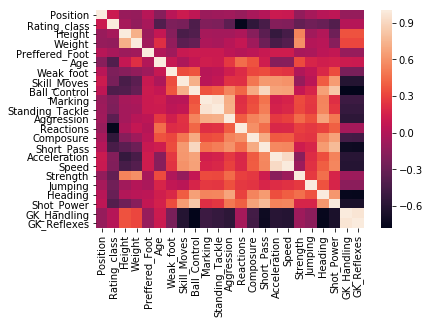

In [6]:
fifa1 = fifa.drop(columns=['Sliding_Tackle', 'Attacking_Position', 'Long_Pass', 'Long_Shots', 'Volleys', 'GK_Kicking', 'GK_Positioning','Rating','Balance', 'Freekick_Accuracy', 'Dribbling', 'Finishing', 'Crossing', 'GK_Diving', 'Agility', 'Vision', 'Interceptions', 'Curve', 'Stamina', 'Penalties'])
corr = fifa1.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In [7]:
fifa.describe()

,Position,Rating_class,Rating,Height,Weight,Preffered_Foot,Age,Weak_foot,Skill_Moves,Ball_Control,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,17588.000000,17588.000000,17588.000000,17588.00000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,5.307596,4.005799,66.166193,181.10547,75.195247,0.232772,25.460314,2.934103,2.303161,57.972766,...,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,5.949618,0.680049,7.083012,6.67516,7.052176,0.422610,4.680217,0.655927,0.746156,16.834779,...,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,0.000000,1.000000,45.000000,155.00000,10.000000,0.000000,17.000000,1.000000,1.000000,5.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,62.000000,176.00000,70.000000,0.000000,22.000000,3.000000,2.000000,53.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,4.000000,66.000000,181.00000,75.000000,0.000000,25.000000,3.000000,2.000000,63.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,10.000000,4.000000,71.000000,186.00000,80.000000,0.000000,29.000000,3.000000,3.000000,69.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,15.000000,5.000000,94.000000,207.00000,99.000000,1.000000,47.000000,5.000000,5.000000,95.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


In [8]:
selected_player = fifa[fifa["Name"] == "Cristiano Ronaldo"].iloc[0]
distance_columns = ['Position','Rating','Height','Weight','Preffered_Foot' ,'Age' ,'Weak_foot', 'Skill_Moves', 'Ball_Control',
 'Dribbling', 'Marking' ,'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
 'Reactions', 'Attacking_Position' ,'Interceptions', 'Vision' ,'Composure',
 'Crossing', 'Short_Pass' ,'Long_Pass' ,'Acceleration' ,'Speed' ,'Stamina',
 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power',
 'Finishing', 'Long_Shots', 'Curve' ,'Freekick_Accuracy', 'Penalties', 'Volleys',
 'GK_Positioning', 'GK_Diving' ,'GK_Kicking', 'GK_Handling' ,'GK_Reflexes']

In [9]:
dis_col = ['Position','Rating','Height','Weight','Preffered_Foot' ,'Age' ,'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Marking' , 'Standing_Tackle', 'Aggression',
 'Reactions','Composure', 'Short_Pass','Acceleration' ,'Speed','Strength', 'Jumping', 'Heading', 'Shot_Power', 'Penalties','GK_Positioning', 'GK_Handling' ,'GK_Reflexes']

In [16]:
def euclidean_distance(row):
    inner_value = 0
    for k in dis_col:
        inner_value += (row[k] - selected_player[k]) ** 2
    return math.sqrt(inner_value)

In [13]:
fifa[dis_col]

,Position,Rating,Height,Weight,Preffered_Foot,Age,Weak_foot,Skill_Moves,Ball_Control,Marking,...,Acceleration,Speed,Strength,Jumping,Heading,Shot_Power,Penalties,GK_Positioning,GK_Handling,GK_Reflexes
0,11,94,185,80,0,32,4,5,93,22,...,91,92,80,95,85,92,85,14,11,11
1,11,93,170,72,1,29,4,4,95,13,...,92,87,59,68,71,85,74,14,11,8
2,11,92,174,68,0,25,5,5,95,21,...,93,90,49,61,62,78,81,15,9,11
3,14,92,182,85,0,30,4,4,91,30,...,88,77,76,69,77,87,85,33,25,37
4,1,92,193,92,0,31,4,1,48,10,...,58,61,83,78,25,25,47,91,90,89
5,11,90,183,74,1,27,3,4,88,51,...,93,95,80,85,86,91,76,5,15,6
6,1,90,193,82,0,26,3,1,31,13,...,56,56,64,67,21,31,40,86,85,90
7,14,90,185,79,0,28,4,3,87,25,...,79,82,84,84,85,86,81,8,6,10
8,14,90,195,95,0,35,4,4,90,15,...,69,74,93,72,80,93,91,9,15,12
9,1,89,199,91,1,24,3,1,23,11,...,46,52,70,68,13,36,27,86,91,89


Selecting one player to compare with other players and find out the most similar player

In [17]:
CR_distance = fifa[dis_col].apply(euclidean_distance, axis=1)

In [18]:
# Select only the numeric columns from the fifa dataset
fifa_numeric = fifa[dis_col]
# Normalize all of the numeric columns
fifa_normalized = (fifa_numeric - fifa_numeric.mean()) / fifa_numeric.std()

In [19]:
# Fill in NA values in fifa_normalized
fifa_normalized.fillna(0, inplace=True)
# Find the normalized vector for CR.
cr_normalized = fifa_normalized[fifa["Name"] == "Cristiano Ronaldo"]
# Find the distance between lebron james and everyone else.
euclidean_distances = fifa_normalized.apply(lambda row:
distance.euclidean(row, cr_normalized), axis=1)
# Create a new dataframe with distances
distance_frame = pandas.DataFrame(data={"dist":
euclidean_distances, "idx": euclidean_distances.index})
distance_frame.sort_values("dist", inplace=True)
# Find the most similar player to cr (the lowest
#distance to cr is cr, the second smallest is the
#most similar non-cr player)
second_smallest = distance_frame.iloc[1]["idx"] 
most_similar_to_cr = fifa.loc[int(second_smallest)]["Name"]
most_similar_to_cr

'Robert Lewandowski'

In [20]:
import numpy as np
import random 
from numpy.random import permutation
# Randomly shuffle the index of fifa. 
random_indices = permutation(fifa.index)
# Set a cutoff for how many items we want in the test set (in this case
#1/3 of the items)
test_cutoff = math.floor(len(fifa)/3)
# Generate the test set by taking the first 1/3 of the randomly
#shuffled indices.

In [21]:
test = fifa.loc[random_indices[1:test_cutoff]]
train = fifa.loc[random_indices[test_cutoff:]]

Using KNN To apply regression to predict the ratings of the players and compute the MSE.

In [22]:
from sklearn.neighbors import KNeighborsRegressor

x_columns =['Rating','Height','Weight','Preffered_Foot' ,'Age' ,'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Marking' , 'Standing_Tackle', 'Aggression',
 'Reactions','Composure', 'Short_Pass','Acceleration' ,'Speed',
 'Strength', 'Jumping', 'Heading', 'Shot_Power', 'Penalties',
 'GK_Positioning', 'GK_Handling' ,'GK_Reflexes']

y_column = ["Rating"]

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(train[x_columns],train[y_column])
predictions = knn.predict(test[x_columns])
print("predictions"," ",predictions)
train[y_column]
# Get the actual values for the test set.
actual = test[y_column]
print("actual","",actual)
# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
print(mse)

predictions   [[ 61.6]
 [ 70.2]
 [ 75.2]
 ..., 
 [ 66.6]
 [ 69.4]
 [ 68.8]]
actual         Rating
15125      58
3762       72
2046       74
1626       75
12182      63
13078      62
7213       68
14481      60
16576      54
8054       67
5932       69
17219      52
3489       72
3124       73
8596       66
3881       71
3775       72
3534       72
7020       68
13919      60
12232      63
12439      63
17243      51
6078       69
5766       69
7304       68
7834       67
5656       69
8661       66
17194      52
...       ...
3610       72
3074       73
5439       70
15         89
592        79
4799       70
14559      59
1126       77
10822      64
1239       76
12888      62
7844       67
500        80
4429       71
10402      65
6387       69
6066       69
1708       75
4502       71
14077      60
4625       71
2410       74
7861       67
5410       70
13953      60
9007       66
17210      52
10138      65
7927       67
7472       68

[5861 rows x 1 columns]
Rating    3.588214
dtyp

In [23]:
fifa.dropna(how='any')

,Name,Position,Rating_class,Rating,Height,Weight,Preffered_Foot,Age,Weak_foot,Skill_Moves,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,11,1,94,185,80,0,32,4,5,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,11,1,93,170,72,1,29,4,4,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,11,1,92,174,68,0,25,5,5,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,14,1,92,182,85,0,30,4,4,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,1,1,92,193,92,0,31,4,1,...,16,14,11,47,11,91,89,95,90,89
5,Gareth Bale,11,1,90,183,74,1,27,3,4,...,90,86,85,76,76,5,15,11,15,6
6,De Gea,1,1,90,193,82,0,26,3,1,...,12,21,19,40,13,86,88,87,85,90
7,Robert Lewandowski,14,1,90,185,79,0,28,4,3,...,82,77,76,81,86,8,15,12,6,10
8,Zlatan Ibrahimović,14,1,90,195,95,0,35,4,4,...,88,82,82,91,93,9,13,10,15,12
9,Thibaut Courtois,1,1,89,199,91,1,24,3,1,...,17,19,11,27,12,86,84,69,91,89


In [34]:
dc=np.array(dis_col)
X=fifa[dc].values
y=fifa.Position

print("Number of classes: " + str(len(np.unique(y))))
print("Number of Features: " + str(len(dis_col)))
print()
print("Features Names: ") 
print(dis_col)
print("Class Names:") 
print(str(np.unique(y)))
print(X.shape)
print(y.shape)

Number of classes: 16
Number of Features: 24

Features Names: 
['Position', 'Rating_class', 'Height', 'Weight', 'Preffered_Foot', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Marking', 'Standing_Tackle', 'Aggression', 'Reactions', 'Composure', 'Short_Pass', 'Acceleration', 'Speed', 'Strength', 'Jumping', 'Heading', 'Shot_Power', 'Penalties', 'GK_Handling', 'GK_Reflexes']
Class Names:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(17588, 24)
(17588,)


In [26]:
dis_col = ['Position','Rating_class','Height','Weight','Preffered_Foot' ,'Age' ,'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Marking' , 'Standing_Tackle', 'Aggression',
 'Reactions','Composure', 'Short_Pass','Acceleration' ,'Speed',
 'Strength', 'Jumping', 'Heading', 'Shot_Power', 'Penalties', 'GK_Handling' ,'GK_Reflexes']

X1=fifa[dis_col].values
y1=fifa.Rating_class

print("Number of classes: " + str(len(np.unique(y1))))
print("Number of Features: " + str(len(dis_col)))
print()
print("Features Names: ") 
print(dis_col)
print("Class Names:") 
print(str(np.unique(y1)))
print(X1.shape)
print(y1.shape)

Number of classes: 5
Number of Features: 24

Features Names: 
['Position', 'Rating_class', 'Height', 'Weight', 'Preffered_Foot', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Marking', 'Standing_Tackle', 'Aggression', 'Reactions', 'Composure', 'Short_Pass', 'Acceleration', 'Speed', 'Strength', 'Jumping', 'Heading', 'Shot_Power', 'Penalties', 'GK_Handling', 'GK_Reflexes']
Class Names:
[1 2 3 4 5]
(17588, 24)
(17588,)


Ploting the relationship between age and the classes of the players,we divided the rating of the players into the following 5 classes:      #we should add position

    Class 1: 89->94
    
    Class 2: 81->89
    
    Class 3: 73->81
    
    Class 4: 61->73
    
    Class 5: 45->61 

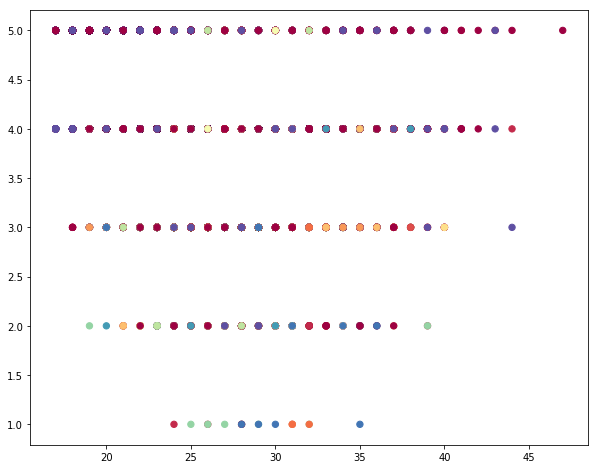

In [29]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.scatter(X1[:,5], y1, s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

Applying SVM model to the dataset in order to classify the players,Different C and KERNEL values were tested and calculated accuracy,f1-score,recall,support

In [35]:
#svm position

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X,y)
y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))



print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4993
          1       1.00      1.00      1.00       417
          2       1.00      1.00      1.00        54
          3       1.00      1.00      1.00       849
          4       1.00      1.00      1.00       434
          5       1.00      1.00      1.00       538
          6       1.00      1.00      1.00       212
          7       1.00      1.00      1.00         4
          8       1.00      1.00      1.00       739
          9       1.00      1.00      1.00        67
         10       1.00      1.00      1.00       598
         11       1.00      1.00      1.00       188
         12       1.00      1.00      1.00        15
         13       1.00      1.00      1.00       270
         14       1.00      1.00      1.00       278
         15       1.00      1.00      1.00      2127

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 

In [36]:
#svm rating class

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=52)
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X1,y1)
y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00       255
          3       1.00      1.00      1.00      1903
          4       1.00      1.00      1.00      7155
          5       1.00      1.00      1.00      2458

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 1.0


In [104]:
#svm position
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
clf = svm.SVC(kernel='poly',C=2)
clf.fit(X,y)
y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4993
          1       1.00      1.00      1.00       417
          2       1.00      1.00      1.00        54
          3       1.00      1.00      1.00       849
          4       1.00      1.00      1.00       434
          5       1.00      1.00      1.00       538
          6       1.00      1.00      1.00       212
          7       1.00      1.00      1.00         4
          8       1.00      1.00      1.00       739
          9       1.00      1.00      1.00        67
         10       1.00      1.00      1.00       598
         11       1.00      1.00      1.00       188
         12       1.00      1.00      1.00        15
         13       1.00      1.00      1.00       270
         14       1.00      1.00      1.00       278
         15       1.00      1.00      1.00      2127

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 

In [105]:
#svm rating class
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=52)
clf = svm.SVC(kernel='poly',C=2)
clf.fit(X1,y1)
y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00       255
          3       1.00      1.00      1.00      1903
          4       1.00      1.00      1.00      7155
          5       1.00      1.00      1.00      2458

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 1.0


In [106]:
#svm position
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
clf = svm.SVC(kernel='rbf',C=2)
clf.fit(X,y)
y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4993
          1       1.00      1.00      1.00       417
          2       1.00      1.00      1.00        54
          3       1.00      1.00      1.00       849
          4       1.00      1.00      1.00       434
          5       1.00      1.00      1.00       538
          6       1.00      1.00      1.00       212
          7       1.00      1.00      1.00         4
          8       1.00      1.00      1.00       739
          9       1.00      1.00      1.00        67
         10       1.00      1.00      1.00       598
         11       1.00      1.00      1.00       188
         12       1.00      1.00      1.00        15
         13       1.00      1.00      1.00       270
         14       1.00      1.00      1.00       278
         15       1.00      1.00      1.00      2127

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 

In [107]:
#svm rating class
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=52)
clf = svm.SVC(kernel='poly',C=2)
clf.fit(X1,y1)
y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00       255
          3       1.00      1.00      1.00      1903
          4       1.00      1.00      1.00      7155
          5       1.00      1.00      1.00      2458

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 1.0


Applying KNN model to the dataset in order to classify the players,
Different number of neighbors were tested and then calculated accuracy,f1-score,recall,support for each one.

In [108]:
#knn position 

n_neighbors = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=52)
clf = neighbors.KNeighborsClassifier(n_neighbors)

clf.fit(X,y)

## Apply the classifer and measure both training and test performance

y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))


print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       0.77      0.94      0.85      5348
          1       0.79      0.73      0.76       456
          2       0.35      0.11      0.16        57
          3       0.71      0.70      0.70       920
          4       0.53      0.42      0.47       467
          5       0.59      0.41      0.49       578
          6       0.36      0.23      0.28       230
          7       0.00      0.00      0.00         4
          8       0.73      0.67      0.70       800
          9       0.67      0.06      0.10        71
         10       0.58      0.50      0.54       646
         11       0.53      0.24      0.33       197
         12       0.00      0.00      0.00        16
         13       0.55      0.45      0.50       293
         14       0.77      0.52      0.62       299
         15       0.94      0.84      0.89      2281

avg / total       0.75      0.76      0.74     12663

Train set Accuracy: 0.7587459527758035
Test

C:\New folder\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
#knn rating class

n_neighbors = 3
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.28, random_state=52)
clf = neighbors.KNeighborsClassifier(n_neighbors)

clf.fit(X1,y1)

## Apply the classifer and measure both training and test performance

y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       0.89      0.57      0.70        14
          2       0.88      0.73      0.80       274
          3       0.89      0.84      0.86      2043
          4       0.93      0.95      0.94      7691
          5       0.92      0.89      0.91      2641

avg / total       0.92      0.92      0.92     12663

Train set Accuracy: 0.9185027244728737
Test Set Accuracy: 0.918984771573604


In [85]:
#knn position

n_neighbors = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=52)
clf = neighbors.KNeighborsClassifier(n_neighbors)

clf.fit(X,y)

## Apply the classifer and measure both training and test performance

y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      5348
          1       0.93      0.53      0.67       456
          2       0.46      0.53      0.49        57
          3       0.77      0.57      0.66       920
          4       0.58      0.53      0.55       467
          5       0.64      0.45      0.53       578
          6       0.47      0.40      0.43       230
          7       1.00      0.25      0.40         4
          8       0.68      0.63      0.66       800
          9       0.47      0.21      0.29        71
         10       0.61      0.61      0.61       646
         11       0.62      0.48      0.54       197
         12       0.50      0.12      0.20        16
         13       0.58      0.71      0.64       293
         14       0.73      0.51      0.60       299
         15       1.00      0.72      0.84      2281

avg / total       0.78      0.77      0.76     12663

Train set Accuracy: 0.7700386954118298
Test

In [110]:
#knn rating class

n_neighbors = 2
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.28, random_state=52)
clf = neighbors.KNeighborsClassifier(n_neighbors)

clf.fit(X1,y1)


## Apply the classifer and measure both training and test performance

y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 


cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))


print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       0.81      1.00      0.89       274
          3       0.82      0.97      0.89      2043
          4       0.93      0.94      0.93      7691
          5       1.00      0.78      0.88      2641

avg / total       0.92      0.91      0.91     12663

Train set Accuracy: 0.9141593619205559
Test Set Accuracy: 0.9153299492385787


In [111]:
#knn position 
n_neighbors = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=52)
clf = neighbors.KNeighborsClassifier(n_neighbors)

clf.fit(X,y)

## Apply the classifer and measure both training and test performance

y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       0.75      0.96      0.84      4617
          1       0.83      0.52      0.64       388
          2       0.33      0.06      0.10        49
          3       0.68      0.56      0.61       787
          4       0.52      0.38      0.44       400
          5       0.55      0.34      0.42       506
          6       0.43      0.20      0.28       183
          7       0.00      0.00      0.00         4
          8       0.68      0.68      0.68       682
          9       0.40      0.03      0.06        60
         10       0.61      0.50      0.55       562
         11       0.59      0.23      0.33       174
         12       0.00      0.00      0.00        15
         13       0.56      0.48      0.52       248
         14       0.65      0.55      0.59       255
         15       0.92      0.83      0.87      1974

avg / total       0.73      0.74      0.73     10904

Train set Accuracy: 0.7447725605282465
Test

C:\New folder\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
#knn rating class
n_neighbors = 4
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.38, random_state=52)
clf = neighbors.KNeighborsClassifier(n_neighbors)

clf.fit(X1,y1)


## Apply the classifer and measure both training and test performance

y_hat_train = clf.predict(X_train)
y_hat_test =clf.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 


cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))


print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       1.00      0.55      0.71        11
          2       0.87      0.79      0.82       239
          3       0.84      0.90      0.86      1759
          4       0.91      0.95      0.93      6633
          5       0.96      0.81      0.88      2262

avg / total       0.91      0.91      0.91     10904

Train set Accuracy: 0.9074651504035216
Test Set Accuracy: 0.9114302812687014


The best classification model was KNN with 2 nearest neighbours 

Naive Bayes Classification

In [113]:
#Naive Bayes position
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
model = GaussianNB()
model.fit(X,y)
y_hat_train = model.predict(X_train)
y_hat_test =model.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))


print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4993
          1       1.00      1.00      1.00       417
          2       1.00      1.00      1.00        54
          3       1.00      1.00      1.00       849
          4       1.00      1.00      1.00       434
          5       1.00      1.00      1.00       538
          6       1.00      1.00      1.00       212
          7       1.00      1.00      1.00         4
          8       1.00      1.00      1.00       739
          9       1.00      1.00      1.00        67
         10       1.00      1.00      1.00       598
         11       1.00      1.00      1.00       188
         12       1.00      1.00      1.00        15
         13       1.00      1.00      1.00       270
         14       1.00      1.00      1.00       278
         15       1.00      1.00      1.00      2127

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 

In [114]:
#Naive Bayes rating class
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=52)
model = GaussianNB()
model.fit(X1,y1)
y_hat_train = model.predict(X_train)
y_hat_test =model.predict(X_test)

train_acc = accuracy_score(y_hat_train, y_train)
test_acc = accuracy_score(y_hat_test, y_test) 

cm=confusion_matrix( y_train,y_hat_train)
print(classification_report(y_train,y_hat_train))

print("Train set Accuracy: " + str(train_acc))
print("Test Set Accuracy: " + str(test_acc))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00       255
          3       1.00      1.00      1.00      1903
          4       1.00      1.00      1.00      7155
          5       1.00      1.00      1.00      2458

avg / total       1.00      1.00      1.00     11783

Train set Accuracy: 1.0
Test Set Accuracy: 1.0


[1 1 1 ... 2 3 3]


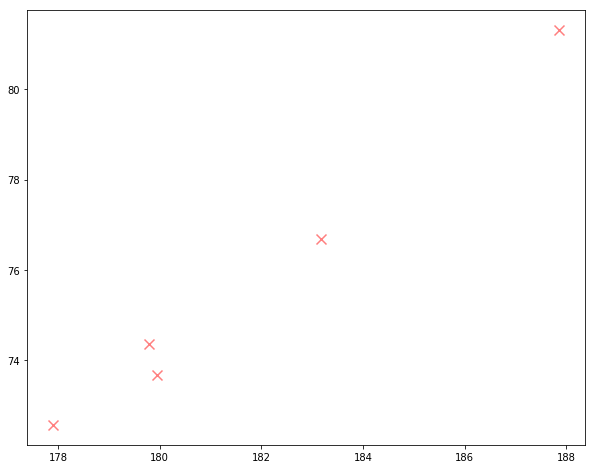

[[179.79913647  74.35235592  26.835367     2.34897691   4.47794256
   67.537263    64.10925474  63.84494087  65.27839309  67.4512859
   68.96489581  66.86277454  57.56316876  66.16688568  60.81753332
   63.61235217  62.28271072  68.61610663  64.94800075  69.24385207
   69.39027595  74.39121457]
 [177.89731525  72.57486853  26.04373097   3.04179352   6.20260172
   70.48712981  70.59036812  31.59230556  33.28840299  36.32687517
   54.95682259  65.63991143  66.69692776  37.4337116   65.11458622
   63.58206477  62.76473844  67.44755051  60.29034044  74.8494326
   74.3329643   67.37309715]
 [179.95584989  73.67034584  22.86791759   2.56916851   7.02281089
   60.1486387   60.14495953  22.25349522  23.21854305  24.32671082
   43.90029433  55.46431199  58.13355408  23.54966887  51.43377483
   52.77557027  45.32082414  54.54782929  43.67660044  70.23767476
   70.43598234  60.43193525]
 [187.86093047  81.31265633  26.47323662   1.00050025   3.70685343
   20.11405703  14.37768884  13.26413207  14

In [119]:
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=5,random_state=1)
distance_columns = ['Height', 'Weight','Age','Skill_Moves','Position', 'Ball_Control',
 'Dribbling', 'Marking' ,'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
 'Reactions', 'Attacking_Position' ,'Interceptions', 'Vision' ,'Composure',
 'Crossing', 'Short_Pass' ,'Long_Pass' ,'Acceleration' ,'Speed' ,'Stamina']
dc=np.array(distance_columns)
kmeans_model.fit(fifa[dc])
labels=kmeans_model.labels_
y_kmeans=kmeans_model.predict(fifa[dc])
cc = kmeans_model.cluster_centers_

print(labels)
plt.scatter(cc[:, 0], cc[:, 1],
            marker='x', s=100, linewidths=3,
            cmap = 'virdis', alpha = 0.5,
            color='red', zorder=190)
plt.show()
print(cc)



In [120]:
from sklearn import linear_model
logClassifier = linear_model.LogisticRegression(C=1,   random_state=111)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
logClassifier.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=111, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
predicted = logClassifier.predict(X_test)

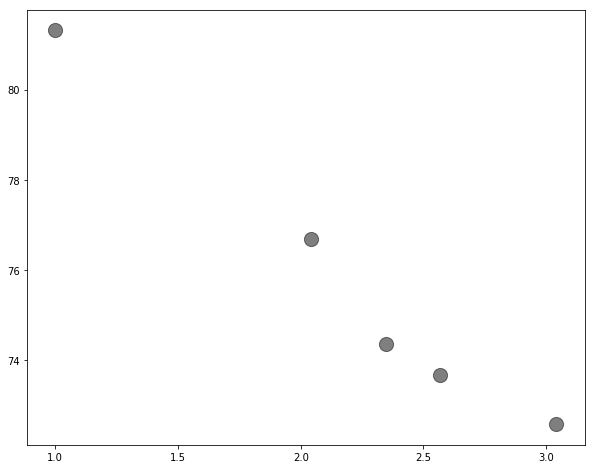

In [138]:
plt.scatter(centers[:, 3], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

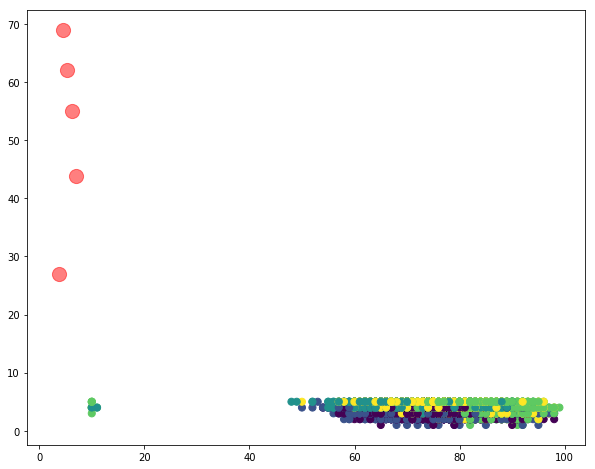

In [125]:
plt.scatter(X[:, 3], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 10], c='red', s=200, alpha=0.5)
plt.show()

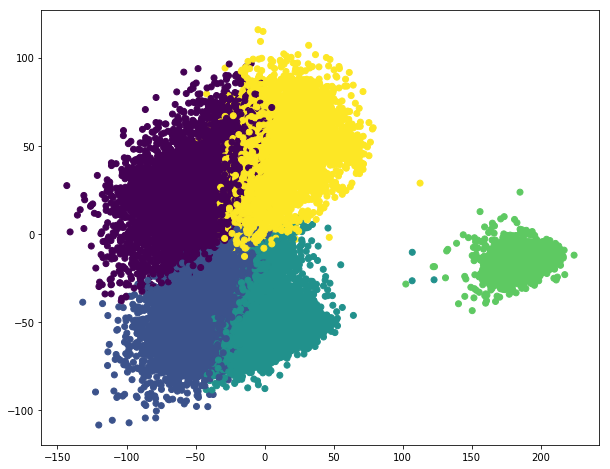

In [126]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(fifa._get_numeric_data().dropna(axis=1))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [132]:
train=fifa.sample(frac=0.8 ,random_state=1)
test=fifa.loc[~fifa.index.isin(train.index)]
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(fifa[dc],fifa["Rating"])
predictions = lr.predict(fifa[dc])
print(predictions)
lr.score(fifa[dc],fifa["Rating"])

[89.28326777 87.01274128 81.64655126 ... 50.73788959 52.5926963
 53.14160648]


0.7538766393516214

In [141]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 0.11029941  0.07295767  0.16106117 -0.04863546 -0.02557974  0.08829775
 -0.02727967 -0.00401621 -0.02381609  0.00815766 -0.0008208   0.48434437
 -0.08790437 -0.00401028  0.04081623  0.04681902  0.01679144  0.04686973
  0.00951479  0.02316257  0.04795083 -0.01132279]
